In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("amazon_baby.csv")
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [37]:
!pip install -U gensim

In [39]:
df=df.dropna()


In [41]:
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [43]:
import numpy as np
np.random.seed(34)
df1=df.sample(frac=0.3)

df1['Sentiments']=df1.rating.apply(lambda x: 0 if x in [1,2] else 1)


In [45]:
df1

,name,review,rating,Sentiments
165191,"aden + anais Rayon From Bamboo Crib Sheet, Azu...",An off-white or cream sheet that is so soft. I...,5,1
108775,Hand Held Scalp Head Massager - Set of Three (...,I was skeptical about how well these will work...,5,1
162820,"Clevamama ClevaFoam Baby Pillow, Cream",It soft and material appears to be excellent. ...,5,1
148217,"Kids Line Velour Changing Pad Cover, Pirate Party",This is a very nice cover. I have two because ...,5,1
46428,"Angel Dear Blankie, Green Frog","I love these Lovies. They are cute, soft and d...",5,1
...,...,...,...,...
137608,Trend Lab CribWrap Fleece Rail Cover for Long ...,Fit my Jenny Lind crib perfectly. Water proof ...,5,1
156932,Babysight Digital Handheld Color Video Monitor,I purchased this and returned it immediately b...,1,0
171309,"Ecosusi Diaper Backpack, (pink)",I love this diaper bag. Everywhere I go with m...,5,1
57598,North American Bear Pastel Pancake Bear Plush ...,This is Pancake Bear number 4 for our house. ...,5,1


In [47]:
df1.isna().sum()

name          0
review        0
rating        0
Sentiments    0
word_count    0
dtype: int64

In [49]:
df1['word_count']=df1['review'].apply(lambda x:len(str(x).split()))
print("Average number of word in sentiment tweet: ",df1[df1['Sentiments']==1]['word_count'].mean())
print("Average number of word in non-sentiment tweet: ",df1[df1['Sentiments']==0]['word_count'].mean())


Average number of word in sentiment tweet:  80.66603391276527
Average number of word in non-sentiment tweet:  92.1632183908046


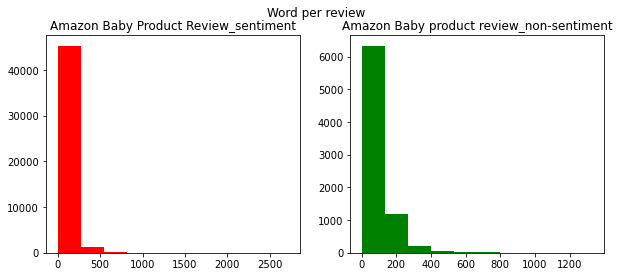

In [51]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df1[df1['Sentiments']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Amazon Baby Product Review_sentiment')
train_words=df1[df1['Sentiments']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Amazon Baby product review_non-sentiment')
fig.suptitle('Word per review')
plt.show()

In [53]:
df1['char_count']=df1['Sentiments'].apply(lambda x:len(str(x)))
print("Average length of character in a disaster tweets: ",df1[df1['Sentiments']==1]['char_count'].mean())
# Disaster tweets
print("Average length of character in a non-disaster tweets: ",df1[df1['Sentiments']==0]['char_count'].mean())
# Non-disaster tweets

Average length of character in a disaster tweets:  1.0
Average length of character in a non-disaster tweets:  1.0


In [55]:

import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec


#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

[nltk_data] Downloading package punkt to /Users/deth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/deth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/deth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df1['clean_text'] = df1['review'].apply(lambda x: finalpreprocess(x))
df1.head()

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df1["clean_text"],df_train["Sentiments"],test_size=0.2,shuffle=True)
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [ ]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
            return self
    def transform(self, X):
            return np.array([
                np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ])


df1['clean_text_tok']=[nltk.word_tokenize(i) for i in df1['clean_text']]

model = Word2Vec(df1['clean_text_tok'],min_count=1)
w2v = dict(zip(model.wv.index2word, model.wv.syn0)) 
   
modelw = MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_test_tok)

In [ ]:
# Fitting the classification model using Logistic Regression (TF_IDF)
lr_tfidf=LogisticRegression(solver='liblinear',C=10,penalty='l2')
lr_tfidf.fit(X_train_vectors_tfidf,y_train)
# Predict Y value for test dataset
y_predict=lr_tfidf.predict(X_test_vectors_tfidf)
y_prob=lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))
print('Confusion Matrix: ', confusion_matrix(y_test,y_predict))

fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
print('AUC: ',roc_auc)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model
#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
#Pre-processing the new dataset
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 
#converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(X_test)
#use the best model to predict 'target' value for the new dataset 
y_predict = lr_tfidf.predict(X_vector)      
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['target']= y_predict
final=df_test[['clean_text','target']].reset_index(drop=True)
print(final.head())